In [14]:
#Name: Sri Jay Adarsh Gogineni
#CWID: 20025484
#Assignment: HW 03 KNN - Train and Test KNN algorithm on the breast cancer wisconsin dataset

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

In [16]:
#Load the Dataset
data = pd.read_csv("breast-cancer-wisconsin.csv")

In [17]:
data.replace("?", np.nan, inplace = True)

In [18]:
#Check Data in Column F6 are strings
are_strings = data['F6'].apply(lambda x: isinstance(x, str))
print("Are strings:", are_strings.any())

Are strings: True


In [19]:
#Convert F6 data to numeric
data["F6"] = pd.to_numeric(data["F6"])

In [20]:
#Check Data in Column F6 are strings
are_strings = data['F6'].apply(lambda x: isinstance(x, str))
print("Are strings:", are_strings.any())

Are strings: False


In [21]:
#Drop the rows with the missing values
data.dropna(inplace=True)

In [22]:
#Convert Diagnosis to categorical data type
le = LabelEncoder()
data["Diagnosis"] = data["Class"].map({2: "benign", 4: "malignant"})

In [23]:
#Select features(F1 to F9) and target(Diagnosis)
X = data.iloc[:,1:10]
y = data["Diagnosis"]

In [24]:
#Split the data into training(70%) and testing(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Accuracy of model for k=3: 0.96

Confusion Matrix for k=3
[[125   2]
 [  7  71]]

Accuracy score for k=3
0.9560975609756097

Classification Report for k=3
              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       127
   malignant       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



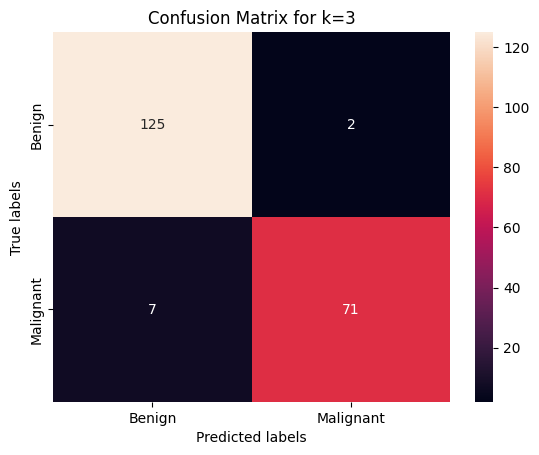


Accuracy of model for k=5: 0.96

Confusion Matrix for k=5
[[125   2]
 [  7  71]]

Accuracy score for k=5
0.9560975609756097

Classification Report for k=5
              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       127
   malignant       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



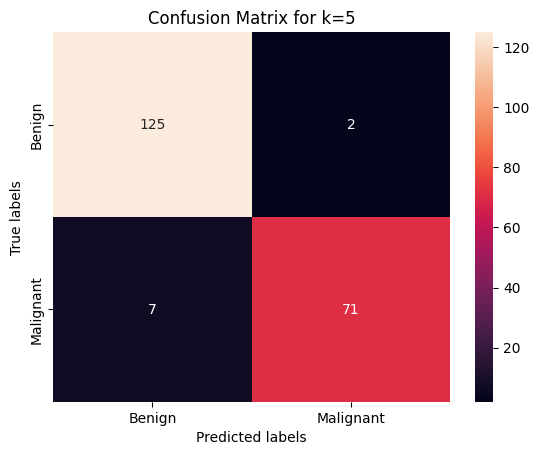


Accuracy of model for k=10: 0.95

Confusion Matrix for k=10
[[125   2]
 [  8  70]]

Accuracy score for k=10
0.9512195121951219

Classification Report for k=10
              precision    recall  f1-score   support

      benign       0.94      0.98      0.96       127
   malignant       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



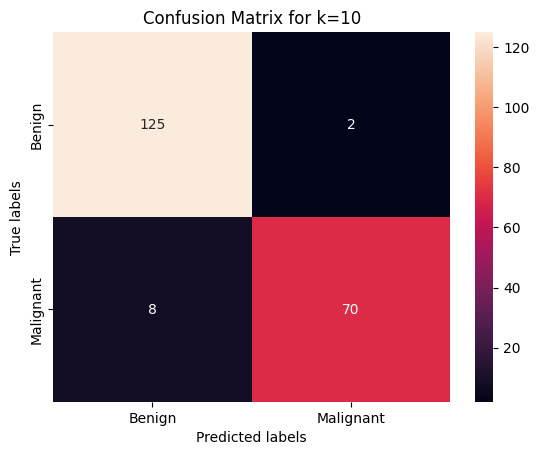

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    print(f"Accuracy of model for k={k}: {accuracy:.2f}")
    print()

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for k={k}')
    print(cm)
    print()

    print(f'Accuracy score for k={k}')
    print(accuracy_score(y_test, y_pred))
    print()

    print(f'Classification Report for k={k}')
    print(classification_report(y_test, y_pred))
    
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for k={k}')
    ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
    ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
    
    plt.show()  # This will display the confusion matrix plot for the current k value
    print()
